In [245]:
from qwind import wind
from qwind.radiation import simple_sed, qsosed
from qwind import streamline, aux_numba
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
import pandas as pd
%matplotlib inline
from matplotlib.colors import LogNorm
from glob import glob
import os
from qwind import constants
from pyagn import sed
from scipy.optimize import curve_fit
import importlib
from qwind import plotting
importlib.reload(plotting)
from pyagn import sed
importlib.reload(radiation)
importlib.reload(wind)
importlib.reload(streamline)
importlib.reload(aux_numba)
importlib.reload(simple_sed)
importlib.reload(qsosed)

<module 'qwind.radiation.qsosed' from '/cosma7/data/dp004/dc-quer1/qwind/qwind/radiation/qsosed.py'>

In [249]:
M_range = [6.31e8] #np.geomspace(1e7, 1e9,11)
mdot_range = np.geomspace(0.1, 1, 4)
models = []
for M in M_range:
    for mdot in [1]:
        models.append(wind.Qwind(M=M, mdot = mdot, n_cpus = 4, nr = 32, rho_shielding = 2e8, radiation_mode = "SimpleSED"))
    

r_in: 200.000000 
 r_out: 1600.000000


In [250]:
model = models[0]

In [251]:
model.start_lines(rho = 2e8)

Starting line iteration
multiple cpus
Failed wind! 



Failed wind! 



Failed wind! 



Failed wind! 



No wind escapes


In [252]:
lines = model.lines

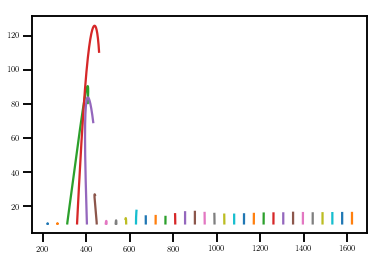

In [253]:
for line in lines:
    plt.plot(line.r_hist, line.z_hist)

In [214]:
model.mdot_w / constants.Ms * constants.year

0.3982604687620611

In [39]:
def read_qwind_file(file):
    df = pd.read_csv(file, sep = "\s+", skiprows=1,  names =['time', 'R', 'PHI', 'Z', 'Vz[km/s]', 'Ve[km/s]', 'fm', 'abs_uv', 'Vtot[km/s]', 'Tau_xt', 'xi_t', 'dv_dr[s]', 'd', 'tau_s', 'Fr_grav[cm/s^2]', 'fr_rad[cm/s^2]', 'L', 'Labs', 'iter', 'tau_eff','r_eff0','r_eff','tau_uv_t', 'Ir', 'Iz', 'tau_X'])
    return df

In [40]:
originals = glob("../../qwind_original/bin64/qw_paper/qwi*")

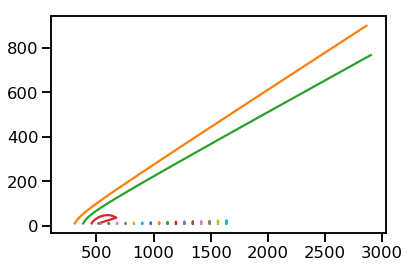

In [42]:
for line in test.lines:
    plt.plot(line.r_hist, line.z_hist)
#plt.xlim(0,1000)
#plt.ylim(0,100)

In [68]:
test.lines[1].escaped

True

In [81]:
asd = wind.Qwind(M=1e8, mdot = 0.5)

r_in: 200.000000 
 r_out: 1600.000000


In [84]:
A = 8 * np.pi * asd.Rg**2 * (400**2 - 200**2)
A

6.575996328521393e+32

In [85]:
rho =  2e8 * constants.m_p 

In [89]:
Mdot = A * rho * 1e7 
print(Mdot / constants.Ms * constants.year)

0.03491186721998649


In [80]:
Mdot / (test.bol_luminosity / (test.eta * constants.c**2))

0.24614288838393683

In [69]:
line = test.lines[1]

In [61]:
line.rho_hist[0]

200000000.0

In [60]:
print("%e"%line.rho_hist[-1])

8.669246e+08


(0, 100)

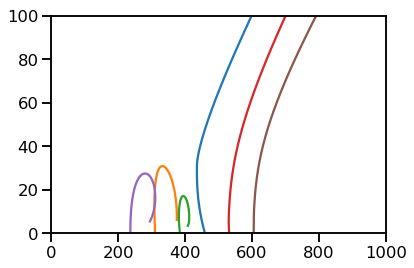

In [27]:
for file in originals:
    df = read_qwind_file(file)
    plt.plot(df.R, df.Z)
plt.xlim(0,1000)
plt.ylim(0,100)

In [29]:
originals

['../../qwind_original/bin64/qw_paper/qwind.dat04',
 '../../qwind_original/bin64/qw_paper/qwind.dat02',
 '../../qwind_original/bin64/qw_paper/qwind.dat03',
 '../../qwind_original/bin64/qw_paper/qwind.dat05',
 '../../qwind_original/bin64/qw_paper/qwind.dat01',
 '../../qwind_original/bin64/qw_paper/qwind.dat06']